<a href="https://colab.research.google.com/github/Jimmy586/DataAnalysis_ProbabilisticModeling/blob/main/MarkovChainSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MARKOV CHAIN AND HMM SIMULATION USING PYTHON**

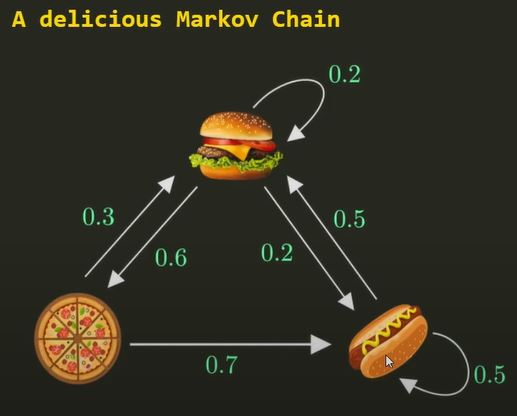

**Burger : 0, Pizza : 1 , Hotdog : 2**

In [1]:
state = {0: "Burger",
         1 : "Pizza",
         2 : "Hotdog"}
state

{0: 'Burger', 1: 'Pizza', 2: 'Hotdog'}

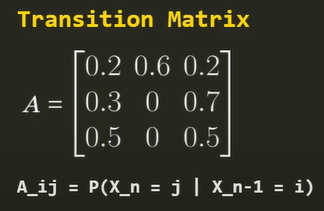

In [4]:
import numpy as np

A = np.array([[0.2, 0.6 , 0.2] , [0.3 , 0.0 , 0.7] , [0.5 , 0.0, 0.5]])
A

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

**RANDOM WALK ON MARKOV CHAIN**

In [7]:
iteration = 15
start_state = np.random.choice([0,1,2])
print(state[start_state], "--->", end = " ")
prev_state = start_state

while iteration-1 :
  curr_state =  np.random.choice([0,1,2], p= A[prev_state])
  print(state[curr_state], "--->", end = " ")
  prev_state = curr_state
  iteration -= 1


Pizza ---> Hotdog ---> Burger ---> Pizza ---> Burger ---> Pizza ---> Hotdog ---> Hotdog ---> Burger ---> Pizza ---> Hotdog ---> Burger ---> Hotdog ---> Hotdog ---> Burger ---> 

**Approach 1 : MONTE CARLO**

In [9]:
# This approach is to try to do the Matrix multiplication with a hight number of steps
steps = 10**6
pi = np.array([0,0,0])
pi[start_state]=1
prev_state = start_state

i = 0
while i< steps:
  curr_state = np.random.choice([0,1,2], p= A[prev_state])
  pi[curr_state] +=1
  prev_state =curr_state
  i +=1
print("pi = ", pi/steps)

pi =  [0.35259  0.211653 0.435758]


**Approach 2 : Repeat Matrix Multiplication**

In [11]:
steps= 10**3
A_n = A
i = 0
while i<steps:
  A_n = np.matmul(A_n, A)
  i +=1

print("A^n = \n", A_n, "\n")
print("pi =", A_n[0])

A^n = 
 [[0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]
 [0.35211268 0.21126761 0.43661972]] 

pi = [0.35211268 0.21126761 0.43661972]


**Approach 3 : Finding LEFT EIGEN Vectors**

In [15]:
import scipy.linalg
values, left = scipy.linalg.eig(A,right=False, left= True)

print("left eigen vectors = ", left)
print("eigen values =", values)

pi =  left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
print("pi =", pi_normalized)

left eigen vectors =  [[-0.58746336+0.j          0.16984156+0.35355339j  0.16984156-0.35355339j]
 [-0.35247801+0.j         -0.67936622+0.j         -0.67936622-0.j        ]
 [-0.72845456+0.j          0.50952467-0.35355339j  0.50952467+0.35355339j]]
eigen values = [ 1.  +0.j        -0.15+0.3122499j -0.15-0.3122499j]
pi = [0.3521126760563379, 0.21126760563380304, 0.4366197183098591]


**P(Pizza,Hotdog, Hotdog, Burger) = ?**

=> P(Pizza) P(Hotdog|Pizza) P(Hotdog|Hotdog) P(Burger|Hotdog)

In [17]:
def probability(seq, A, pi):
  start_state = seq[0]
  prob = pi[start_state]
  prev_state = start_state
  for i in range(1, len(seq)):
    curr_state =  seq[i]
    prob *= A[prev_state][curr_state]
    prev_state = curr_state

  return prob


print(probability([1,2,2,0], A, pi_normalized))

0.03697183098591553


# **LET'S TRY A MORE ABSTRACT PROBLEM**

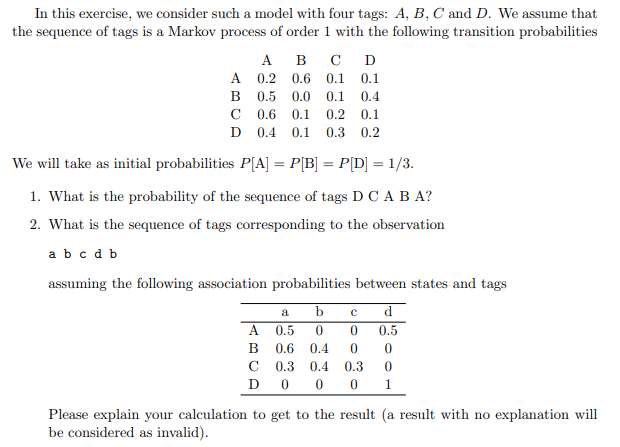

In [36]:

state = {0: "A",
         1 : "B",
         2 : "C",
         3 : "D"}
A = np.array([[0.2, 0.6 , 0.1 , 0.1] , [0.5 , 0.0 , 0.1 , 0.4] , [0.6, 0.1, 0.2 , 0.1] , [0.4 , 0.1 , 0.3 , 0.2]])
pi = [0.33,0.33,0,0.33]

prob = probability([3,2,0,1,0], A, pi)

In [37]:
print(prob)
print("Log of probs : ", np.log(prob))

0.01782
Log of probs :  -4.027433856939473


In [38]:
hidden_state = {0: "a",
                1 : "b",
                2 : "c",
                3 : "d"}
A_hidden = np.array([[0.5, 0 , 0 , 0.5] , [0.6 , 0.4 , 0 , 0] , [0.3, 0.4, 0.3, 0] , [0 , 0 , 0 , 1]])

In [40]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.5 MB/s eta 0:00:00


In [56]:
import hmmlearn

def best_sequence_tags(observation, m, start_prob, trans_prob, emit_prob):
    n = len(observation)


    # Initialize the Viterbi matrix and the backpointer matrix
    viterbi = [[0.0] * m for _ in range(n)]
    backpointer = [[0] * m for _ in range(n)]

    # Initialize the first column of the Viterbi matrix
    for i in range(m):
        viterbi[0][i] = start_prob[i] * emit_prob[i][observation[0]]
        backpointer[0][i] = -1  # No previous state for the first observation

    # Fill in the rest of the Viterbi matrix
    for t in range(1, n):
        for i in range(m):
            max_prob = 0.0
            prev_state = -1

            for j in range(m):
                prob = viterbi[t - 1][j] * trans_prob[j][i] * emit_prob[i][observation[t]]
                if prob > max_prob:
                    max_prob = prob
                    prev_state = j

            viterbi[t][i] = max_prob
            backpointer[t][i] = prev_state

    # Find the best final state (argmax of the last column of Viterbi matrix)
    best_final_state = max(range(m), key=lambda i: viterbi[n - 1][i])

    # Backtrack to find the best path
    best_path = [best_final_state]
    for t in range(n - 1, 0, -1):
        best_final_state = backpointer[t][best_final_state]
        best_path.insert(0, best_final_state)
    values = []
    for item in range(len(best_path)):
      values.append(state.get(best_path[item]))
    return values

In [57]:
print(best_sequence_tags([0,1,2,3,1],4,pi,A,A_hidden))

['A', 'B', 'C', 'A', 'B']
